In [1]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import tensorflow as tf
train_df = df.sample(frac=0.75, random_state=4)
val_df = df.drop(train_df.index)




In [ ]:
max_val = df.max(axis=0)
min_val = df.min(axis=0)

range = max_val -min_val
train_df =(train_df - min_val)/range
val_df = (val_df - min_val)/range

In [ ]:
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']
input_shape =[X_train.shape[1]]
input_shape


[11]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_shape=input_shape)])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mae')

In [ ]:
losses = model.fit(X_train, y_train,

				validation_data=(X_val, y_val),

				batch_size=256,
				epochs=15,

				)


Epoch 1/15
5/5 [==============================] - 1s 79ms/step - loss: 0.7464 - val_loss: 0.7303
Epoch 2/15
5/5 [==============================] - 0s 21ms/step - loss: 0.7268 - val_loss: 0.7109
Epoch 3/15
5/5 [==============================] - 0s 18ms/step - loss: 0.7072 - val_loss: 0.6916
Epoch 4/15
5/5 [==============================] - 0s 16ms/step - loss: 0.6875 - val_loss: 0.6723
Epoch 5/15
5/5 [==============================] - 0s 20ms/step - loss: 0.6679 - val_loss: 0.6529
Epoch 6/15
5/5 [==============================] - 0s 21ms/step - loss: 0.6483 - val_loss: 0.6336
Epoch 7/15
5/5 [==============================] - 0s 9ms/step - loss: 0.6288 - val_loss: 0.6142
Epoch 8/15
5/5 [==============================] - 0s 14ms/step - loss: 0.6092 - val_loss: 0.5949
Epoch 9/15
5/5 [==============================] - 0s 15ms/step - loss: 0.5897 - val_loss: 0.5756
Epoch 10/15
5/5 [==============================] - 0s 17ms/step - loss: 0.5701 - val_loss: 0.5563
Epoch 11/15
5/5 [=============

In [ ]:
model.predict(X_val.iloc[0:3, :])

1/1 [==============================] - 0s 87ms/step


array([[ 0.15696576],
       [-0.08594935],
       [ 0.1495266 ]], dtype=float32)

In [ ]:
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

In [ ]:
loss_df = pd.DataFrame(losses.history)


<Axes: >

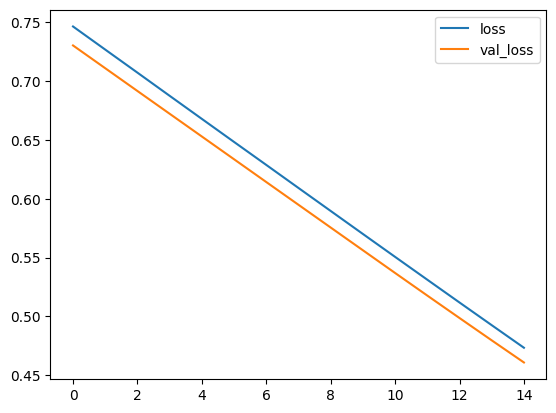

In [ ]:
loss_df.loc[:,['loss','val_loss']].plot()